In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train/Food',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train/Food',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 20 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [7]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [9]:
training_data.class_indices

{'Bánh bao': 0,
 'Bánh canh': 1,
 'Bánh mì': 2,
 'Bún bò': 3,
 'Bún riêu': 4,
 'Cháo': 5,
 'Gỏi': 6,
 'Mì Quảng': 7,
 'Phở': 8,
 'Xôi': 9}

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=50,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 2.4625 - accuracy: 0.1000 - val_loss: 11.9751 - val_accuracy: 0.1000
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 11.9906 - accuracy: 0.1000 - val_loss: 8.4767 - val_accuracy: 0.1000
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 8.4216 - accuracy: 0.1000 - val_loss: 4.1083 - val_accuracy: 0.1000
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 4.1197 - accuracy: 0.1000 - val_loss: 2.5141 - val_accuracy: 0.1000
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 2.5447 - accuracy: 0.1000 - val_loss: 2.2121 - val_accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 2.2390 - accuracy: 0.2000 - val_loss: 2.0624 - val_accuracy: 0.4000
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 2.1069 - accuracy: 0.3000 - val_loss: 1.9917 - val_accuracy: 0.1500
Epoch 8/50
1/1 [=======================

Sai số kiểm tra là:  0.0020135294180363417
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

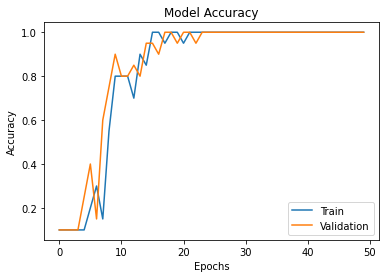

In [11]:
# Đánh giá chất lượng mô hình và đồ thị:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
model.save('food.h1')
model=load_model('food.h1')

INFO:tensorflow:Assets written to: food.h1/assets


Đây là Bánh mì


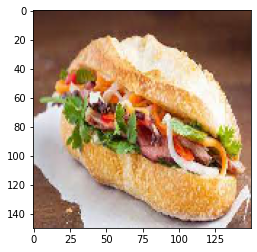

In [18]:
from tensorflow.keras.models import load_model
img=load_img("/content/drive/MyDrive/AI/Train/Food/Bánh mì/bm1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][2])==1:
  prediction='Đây là Bánh mì'
if round(result[0][4])==1:
  prediction='Đây là Bún riêu'
if round(result[0][6])==1:
  prediction='Đây là Gỏi'
print(prediction)

Đây là Bún riêu


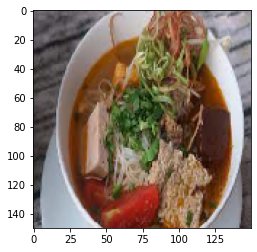

In [19]:
img=load_img("/content/drive/MyDrive/AI/Train/Food/Bún riêu/br1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][2])==1:
  prediction='Đây là Bánh mì'
if round(result[0][4])==1:
  prediction='Đây là Bún riêu'
if round(result[0][6])==1:
  prediction='Đây là Gỏi'
print(prediction)

Đây là Gỏi


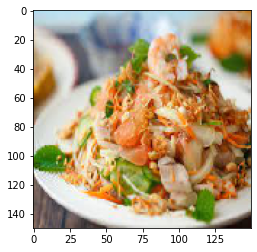

In [20]:
img=load_img("/content/drive/MyDrive/AI/Train/Food/Gỏi/g1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][2])==1:
  prediction='Đây là Bánh mì'
if round(result[0][4])==1:
  prediction='Đây là Bún riêu'
if round(result[0][6])==1:
  prediction='Đây là Gỏi'
print(prediction)